<a href="https://colab.research.google.com/github/lamakye7/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd


import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score

%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 150)
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] =(10,6)
plt.rcParams["figure.facecolor"] = "#00000000"

In [ ]:
# load file
df_newcustomer = pd.read_excel("NewCustomerLists.xlsx")
df_transaction = pd.read_excel("Transactions.xlsx")
df_customerDemo = pd.read_excel("CustomerDemographic.xlsx")
df_address = pd.read_excel("CustomerAddress.xlsx")

In [ ]:
df_newcustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,65.903365,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,53.201995,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,48.763638,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,44.341721,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,57.703365,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [ ]:
df_customerDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,69.654059,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16,42.456798,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20,69.380086,Recruiting Manager,Property,Mass Customer,N,Yes,15
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,46.054059,Senior Editor,NaN,Affluent Customer,N,Yes,8
4,8,Rod,Inder,Male,31,1962-03-30,61.185565,Media Manager I,NaN,Mass Customer,N,No,7


In [ ]:
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [80]:
df_newcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           878 non-null    object        
 1   last_name                            852 non-null    object        
 2   gender                               878 non-null    object        
 3   past_3_years_bike_related_purchases  878 non-null    int64         
 4   DOB                                  878 non-null    datetime64[ns]
 5   age                                  878 non-null    float64       
 6   job_title                            878 non-null    object        
 7   job_industry_category                735 non-null    object        
 8   wealth_segment                       878 non-null    object        
 9   deceased_indicator                   878 non-null    object        
 10  owns_car      

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
# Merge the df_customerDemo  and df_address  based on the customer_id column
merged_df = pd.merge(df_customerDemo, df_address, on='customer_id')

# Print the merged DataFrame
merged_df.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,69.654059,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,NSW,10
1,2,Eli,Bockman,Male,81,1980-12-16,42.456798,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,NSW,10
2,5,Sheila-kathryn,Calton,Female,56,1977-05-13,46.054059,Senior Editor,NaN,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,NSW,4
3,8,Rod,Inder,Male,31,1962-03-30,61.185565,Media Manager I,NaN,Mass Customer,N,No,7,49 Londonderry Lane,2650,NSW,4
4,9,Mala,Lind,Female,97,1973-03-10,50.232141,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,97736 7th Trail,2023,NSW,12


In [ ]:
merged_df.shape

(3411, 17)

In [ ]:
merged_df.nunique()

customer_id                            3411
first_name                             2778
last_name                              3199
gender                                    2
past_3_years_bike_related_purchases     100
DOB                                    3054
age                                    3191
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   22
address                                3409
postcode                                838
state                                     3
property_valuation                       12
dtype: int64

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 0 to 3410
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3411 non-null   int64         
 1   first_name                           3411 non-null   object        
 2   last_name                            3306 non-null   object        
 3   gender                               3411 non-null   object        
 4   past_3_years_bike_related_purchases  3411 non-null   int64         
 5   DOB                                  3411 non-null   datetime64[ns]
 6   age                                  3411 non-null   float64       
 7   job_title                            3411 non-null   object        
 8   job_industry_category                2860 non-null   object        
 9   wealth_segment                       3411 non-null   object        
 10  deceased_ind

In [ ]:
df_newcustomer.nunique()

first_name                             831
last_name                              845
gender                                   2
past_3_years_bike_related_purchases    100
DOB                                    856
age                                    856
job_title                              184
job_industry_category                    9
wealth_segment                           3
deceased_indicator                       1
owns_car                                 2
tenure                                  22
address                                878
postcode                               487
state                                    3
country                                  1
property_valuation                      12
Rank                                   314
Value                                  314
dtype: int64

In [81]:
df_newcustomer["age"] = df_newcustomer["age"].astype(int)

In [ ]:
df_newcustomer.nunique()

first_name                             831
last_name                              845
gender                                   2
past_3_years_bike_related_purchases    100
DOB                                    856
age                                     65
job_title                              184
job_industry_category                    9
wealth_segment                           3
deceased_indicator                       1
owns_car                                 2
tenure                                  22
address                                878
postcode                               487
state                                    3
country                                  1
property_valuation                      12
Rank                                   314
Value                                  314
dtype: int64

In [82]:
# Check null values
df_newcustomer.isna().sum()

first_name                               0
last_name                               26
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
age                                      0
job_title                                0
job_industry_category                  143
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [83]:
df_newcustomer["job_industry_category"] = df_newcustomer["job_industry_category"].fillna("NotMention")

In [ ]:
# Encoder Catergorical Columns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

In [ ]:
# Scaler Numerical Columns for train set
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

In [ ]:
# Scaler Numerical Columns for test set
df_test[numeric_cols] = scaler.fit_transform(df_test[numeric_cols])

In [ ]:
# Encode categorical columnns for df_train
df_train["gender"]= label_encoder.fit_transform(df_train["gender"])
#df_train['job_title']= label_encoder.fit_transform(df_train['job_title'])
df_train["job_industry_category"]= label_encoder.fit_transform(df_train["job_industry_category"])
df_train["wealth_segment"]= label_encoder.fit_transform(df_train["wealth_segment"])
df_train["state"]= label_encoder.fit_transform(df_train["state"])
df_train["owns_car"]= label_encoder.fit_transform(df_train["owns_car"])

In [ ]:
# Encode categorical columnns for df_test
df_test["gender"]= label_encoder.fit_transform(df_test["gender"])
#df_test['job_title']= label_encoder.fit_transform(df_test['job_title'])
df_test["job_industry_category"]= label_encoder.fit_transform(df_test["job_industry_category"])
df_test["wealth_segment"]= label_encoder.fit_transform(df_test["wealth_segment"])
df_test["state"]= label_encoder.fit_transform(df_test["state"])
df_test["owns_car"]= label_encoder.fit_transform(df_test["owns_car"])

In [ ]:
df_train.head()

,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,0,1.52,1.90,3,2,1,0.06,0,0.88
1,1,1.10,-0.25,2,2,1,0.94,0,0.88
2,0,0.23,0.07,6,0,1,-0.47,0,-1.25
3,1,-0.64,1.26,6,2,0,-0.65,0,-1.25
4,0,1.66,0.39,0,0,1,-0.47,0,1.59


In [ ]:
df_test.head()

,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation
0,1,1.32,0.81,5,2,1,0.52,1.73,1,-0.51
1,1,0.71,0.10,7,2,0,0.92,-1.08,0,1.29
2,0,-1.40,-0.19,2,0,0,-0.27,0.56,2,-0.87
3,0,0.53,-0.42,5,0,1,-1.26,2.09,1,-2.32
4,0,-0.54,0.34,2,0,0,1.51,-1.10,0,0.57


# Modelling 

## RFM Segmentation 

In [ ]:
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [55]:
# Calculate Recency, Frequency, and Monetary Value metrics
snapshot_date = df_transaction['transaction_date'].max() + pd.DateOffset(days=1)
df_transaction['Recency'] = (snapshot_date - df_transaction['transaction_date']).dt.days
df_rfm = df_transaction.groupby('customer_id').agg({
    'Recency': 'min',
    'transaction_id': 'count',
    'list_price': 'sum'}).reset_index()

In [56]:
# Rename the columns
df_rfm.rename(columns={'transaction_id': 'Frequency', 'list_price': 'MonetaryValue'}, inplace=True)

In [57]:
df_rfm.head()

,customer_id,Recency,Frequency,MonetaryValue
0,1,8,11,9084.45
1,2,129,3,4149.07
2,3,103,8,9888.23
3,4,196,2,1047.72
4,5,17,6,5903.20


In [58]:
# Create RFM segments based on quartiles
rfm_segments = pd.qcut(df_rfm['Recency'], q=4, labels=['4', '3', '2', '1'])
df_rfm['R'] = rfm_segments.values
df_rfm['F'] = pd.qcut(df_rfm['Frequency'], q=4, labels=['1', '2', '3', '4'])
df_rfm['M'] = pd.qcut(df_rfm['MonetaryValue'], q=4, labels=['1', '2', '3', '4'])

In [59]:
# Calculate RFM score
df_rfm['RFM_Score'] = df_rfm['R'].astype(str) + df_rfm['F'].astype(str) + df_rfm['M'].astype(str)

In [60]:
df_rfm

,customer_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
0,1,8,11,9084.45,4,4,4,444
1,2,129,3,4149.07,1,1,1,111
2,3,103,8,9888.23,1,4,4,144
3,4,196,2,1047.72,1,1,1,111
4,5,17,6,5903.20,4,2,2,422
...,...,...,...,...,...,...,...,...
3489,3497,53,3,3744.07,2,1,1,211
3490,3498,128,6,5177.06,1,2,2,122
3491,3499,52,7,7673.48,2,3,3,233
3492,3500,145,6,4922.41,1,2,2,122


In [61]:
# Perform RFM segmentation
segments = {
    'Best Customers': ['444'],
    'Loyal Customers': ['344', '443', '343','434',"424"],
    'Big Spenders': ['334', '343', '433', '244',"442"],
    'Potential Loyalists': ['234', '324', '243','423', '432', '342'],
    'Promising Customers': ['333', '332', '233', '323', '413', '341', '431', '134', '143', "314"],
    'Needs Attention': ["422", '214', '421', '241', '124', '142', "331","133", "224", "242","232", "313","412"],
    'About to Sleep': ['231',"212", "222", "223","221","122","133","144", "322","312", "321","231", "213", "132"],
    'At Risk': ['141', '142', '241','112','113','114',"141","131","121","311", "123", "411", "211"],
    'Lost Customers': ['111']}

#df_rfm['Segment'] = df_rfm['RFM_Score'].map(lambda x: [k for k, v in segments.items() if x in v][0])
df_rfm['Segment'] = df_rfm['RFM_Score'].map(lambda x: [k for k, v in segments.items() if x in v][0] if any(x in v for v in segments.values()) else 'Other')


# Print the RFM segments
print(df_rfm[['Recency', 'Frequency', 'MonetaryValue', 'RFM_Score', 'Segment']].head())


   Recency  Frequency  MonetaryValue RFM_Score          Segment
0        8         11        9084.45       444   Best Customers
1      129          3        4149.07       111   Lost Customers
2      103          8        9888.23       144   About to Sleep
3      196          2        1047.72       111   Lost Customers
4       17          6        5903.20       422  Needs Attention


In [62]:
# Calculate the average values for each RFM segment
df_segment_avg = df_rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).round(2)

# Calculate the count and percentage of customers in each segment
df_segment_counts = df_rfm['Segment'].value_counts().reset_index()
df_segment_counts.columns = ['Segment', 'Count']
df_segment_counts['Percentage'] = (df_segment_counts['Count'] / df_segment_counts['Count'].sum() * 100).round(2)

# Print the average values for each segment
print("\nAverage RFM values for each segment:")
print(df_segment_avg)

# Print the count and percentage of customers in each segment
print("\nCount and percentage of customers in each segment:")
print(df_segment_counts)


Average RFM values for each segment:
                     Recency  Frequency  MonetaryValue
Segment                                               
About to Sleep         66.83       5.29        5565.79
At Risk                78.42       3.71        4068.75
Best Customers          8.67       9.44       10991.05
Big Spenders           43.18       8.18        9283.27
Lost Customers        164.25       2.63        2547.57
Loyal Customers        24.05       8.59        9850.10
Needs Attention        40.61       5.41        5855.51
Potential Loyalists    30.80       6.46        7577.94
Promising Customers    46.97       6.40        7132.52

Count and percentage of customers in each segment:
               Segment  Count  Percentage
0       About to Sleep    740       21.18
1              At Risk    683       19.55
2      Loyal Customers    359       10.27
3       Lost Customers    337        9.65
4      Needs Attention    329        9.42
5  Promising Customers    319        9.13
6  Potentia

<Axes: title={'center': 'Monetary Value'}, xlabel='Segment'>

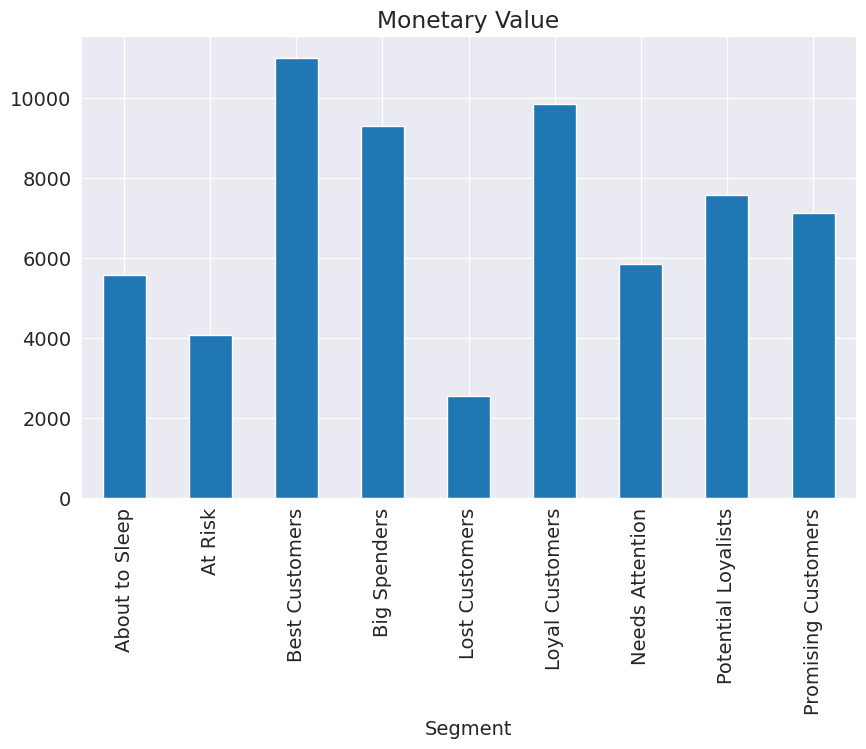

In [43]:
df_segment_avg["MonetaryValue"].plot(kind= "bar", title ="Monetary Value")

<Axes: title={'center': 'Recency'}, xlabel='Segment'>

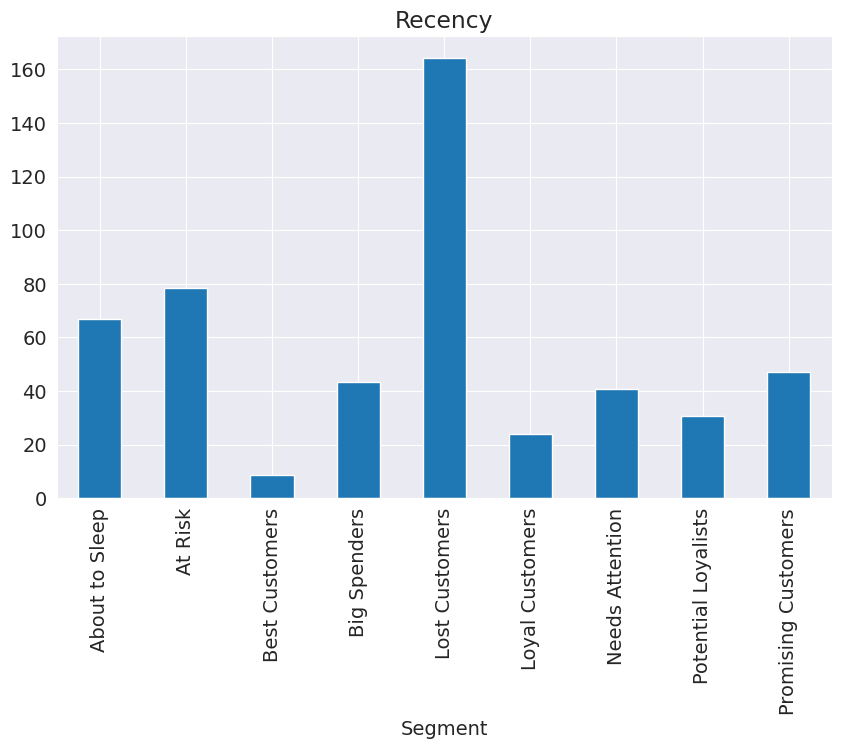

In [45]:
df_segment_avg["Recency"].plot(kind= "bar", title ="Recency")

<Axes: title={'center': 'Frequency'}, xlabel='Segment'>

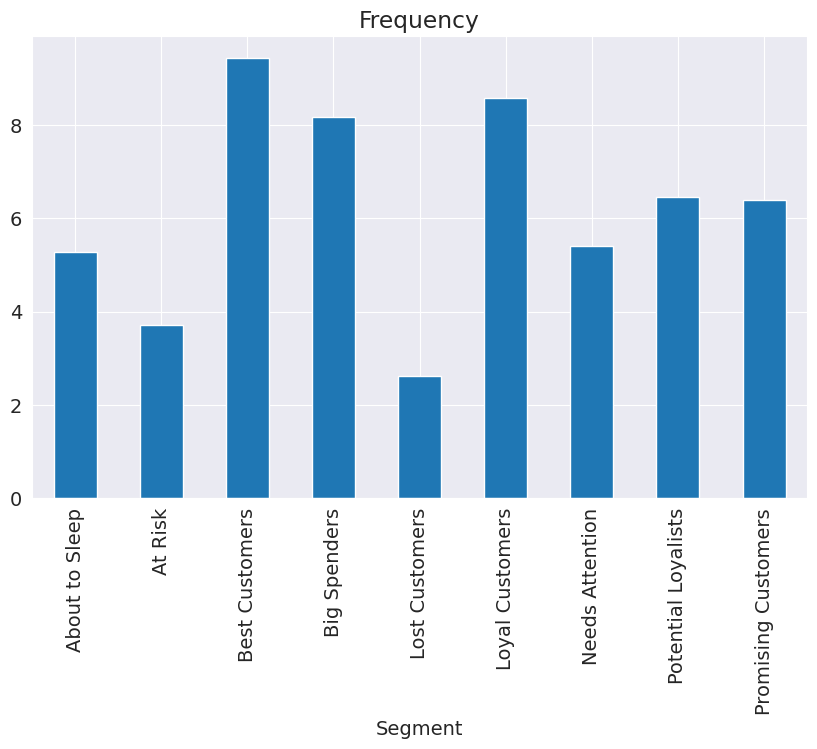

In [47]:
df_segment_avg["Frequency"].plot(kind= "bar", title ="Frequency")

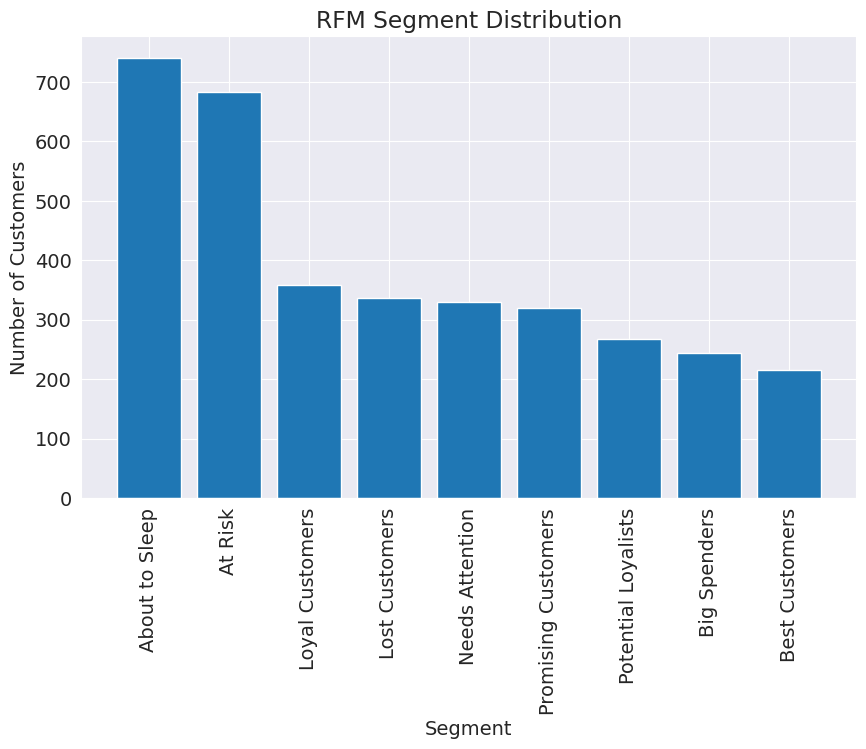

In [68]:
plt.bar(df_segment_counts["Segment"],df_segment_counts["Count"]) 
plt.xticks(rotation= 90)
plt.title("RFM Segment Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.show()

In [69]:
df_rfm.head()

,customer_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,Segment
0,1,8,11,9084.45,4,4,4,444,Best Customers
1,2,129,3,4149.07,1,1,1,111,Lost Customers
2,3,103,8,9888.23,1,4,4,144,About to Sleep
3,4,196,2,1047.72,1,1,1,111,Lost Customers
4,5,17,6,5903.20,4,2,2,422,Needs Attention


In [70]:
df_rfm.to_csv('rfm.csv', index=False)

##### Merging of dataframe

In [73]:
# Define functions to merge on customer id
def merge_data(data1, data2, on='customer_id'):
  df= pd.merge(data1,data2,on='customer_id')
  return df


In [75]:
# merge df_rfm and df_transaction
df_transaction_rfm = merge_data(df_transaction,df_rfm)
df_transaction_rfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Recency_x,Recency_y,Frequency,MonetaryValue,R,F,M,RFM_Score,Segment
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,309,76,3,1953.15,2,1,1,211,At Risk
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,76,76,3,1953.15,2,1,1,211,At Risk
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,249,76,3,1953.15,2,1,1,211,At Risk
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,224,21,7,7351.70,3,3,3,333,Promising Customers
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,87,21,7,7351.70,3,3,3,333,Promising Customers


In [76]:
df_transaction_rfm.to_csv('transaction_and_rfm.csv', index=False)

In [77]:
df_customer_rfm = merge_data(merged_df,df_rfm)
df_customer_rfm

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,Segment
0,1,Laraine,Medendorp,Female,93,1953-10-12,69.654059,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,NSW,10,8,11,9084.45,4,4,4,444,Best Customers
1,2,Eli,Bockman,Male,81,1980-12-16,42.456798,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,NSW,10,129,3,4149.07,1,1,1,111,Lost Customers
2,5,Sheila-kathryn,Calton,Female,56,1977-05-13,46.054059,Senior Editor,NaN,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,NSW,4,17,6,5903.20,4,2,2,422,Needs Attention
3,8,Rod,Inder,Male,31,1962-03-30,61.185565,Media Manager I,NaN,Mass Customer,N,No,7,49 Londonderry Lane,2650,NSW,4,23,10,12024.76,3,4,4,344,Loyal Customers
4,9,Mala,Lind,Female,97,1973-03-10,50.232141,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,97736 7th Trail,2023,NSW,12,79,6,5357.55,2,2,2,222,About to Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,3493,Jeffie,Eakly,Male,30,1964-02-29,59.265017,Research Assistant I,Health,High Net Worth,N,No,18,3 Monument Crossing,2090,NSW,10,94,6,10053.82,1,2,4,124,Needs Attention
2992,3494,Robers,Richen,Male,72,1998-12-24,24.423922,Account Representative IV,Argiculture,High Net Worth,N,No,1,35 Chive Alley,2033,NSW,10,5,4,5122.71,4,1,2,412,Needs Attention
2993,3495,Constantine,Frissell,Female,57,1987-07-12,35.884196,Programmer III,Financial Services,High Net Worth,N,No,8,1 Dayton Park,2767,NSW,9,14,7,8626.65,4,3,4,434,Loyal Customers
2994,3496,Danya,Burnyeat,Male,99,1986-04-25,37.097894,Editor,Manufacturing,Mass Customer,N,Yes,19,2565 Caliangt Point,2171,NSW,9,257,4,4725.38,1,1,2,112,At Risk


In [78]:
df_customer_rfm.to_csv('customerDemographic_and_rfm.csv', index=False)

## Clustering KMeans 

#### Preprocessing for Clustering Model

In [79]:
df_customer_rfm.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state',
       'property_valuation', 'Recency', 'Frequency', 'MonetaryValue', 'R', 'F',
       'M', 'RFM_Score', 'Segment'],
      dtype='object')

In [84]:
df_newcustomer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [85]:
# change age to integer
df_customer_rfm["age"] = df_customer_rfm["age"].astype(int)

In [86]:
df_customer_rfm["job_industry_category"] = df_customer_rfm["job_industry_category"].fillna("NotMention")

In [153]:
feature = ['gender',
        'age', 
       'wealth_segment',
       'owns_car', 'tenure',  'state',
       ]


In [154]:
df_train = df_customer_rfm[feature]
df_target = df_newcustomer[feature]

In [142]:
df_train.nunique()

gender                    2
age                      52
job_industry_category    10
wealth_segment            3
owns_car                  2
tenure                   22
state                     3
dtype: int64

In [143]:
df_target.nunique()

gender                    2
age                      65
job_industry_category    10
wealth_segment            3
owns_car                  2
tenure                   22
state                     3
dtype: int64

In [155]:
numeric_cols = df_train.select_dtypes(include = np.number).columns.tolist()

In [145]:
numeric_cols 

['age', 'tenure']

In [156]:
# Encoder Catergorical Columns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [157]:
# Encode categorical columnns for df_train
df_train["gender"]= label_encoder.fit_transform(df_train["gender"])
#df_train["job_industry_category"]= label_encoder.fit_transform(df_train["job_industry_category"])
df_train["wealth_segment"]= label_encoder.fit_transform(df_train["wealth_segment"])
df_train["state"]= label_encoder.fit_transform(df_train["state"])
df_train["owns_car"]= label_encoder.fit_transform(df_train["owns_car"])

# Encode categorical columnns for df_target
df_target["gender"]= label_encoder.fit_transform(df_target["gender"])
#df_target["job_industry_category"]= label_encoder.fit_transform(df_target["job_industry_category"])
df_target["wealth_segment"]= label_encoder.fit_transform(df_target["wealth_segment"])
df_target["state"]= label_encoder.fit_transform(df_target["state"])
df_target["owns_car"]= label_encoder.fit_transform(df_target["owns_car"])

In [158]:
# Scaler Numerical Columns for train set
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

# Scaler Numerical Columns for train set
df_target[numeric_cols] = scaler.fit_transform(df_target[numeric_cols])


In [159]:
df_train.head()

,gender,age,wealth_segment,owns_car,tenure,state
0,0,1.902639,2,1,0.058635,0
1,1,-0.251159,2,1,0.940521,0
2,0,0.067922,0,1,-0.470496,0
3,1,1.264476,2,0,-0.646873,0
4,0,0.387003,0,1,-0.470496,0


In [160]:
# model using K-means clustering
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_train)

KMeans(n_clusters=4, random_state=42)

## Evaluation

In [161]:
# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(df_train, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.20145366622220115


In [162]:
# Evaluate the model using entropy
labels = kmeans.labels_
unique_labels = np.unique(labels)
counts = np.bincount(labels)
proportions = counts / len(labels)
entropy_value = entropy(proportions)
print(f"Entropy: {entropy_value}")

Entropy: 1.3847235313704918


In [163]:
# Assign the cluster labels to the original dataset
df_customer_rfm['Cluster'] = kmeans.labels_
df_customer_rfm.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,Segment,Cluster
0,1,Laraine,Medendorp,Female,93,1953-10-12,69,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,NSW,10,8,11,9084.45,4,4,4,444,Best Customers,0
1,2,Eli,Bockman,Male,81,1980-12-16,42,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,NSW,10,129,3,4149.07,1,1,1,111,Lost Customers,0
2,5,Sheila-kathryn,Calton,Female,56,1977-05-13,46,Senior Editor,NotMention,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,NSW,4,17,6,5903.20,4,2,2,422,Needs Attention,3
3,8,Rod,Inder,Male,31,1962-03-30,61,Media Manager I,NotMention,Mass Customer,N,No,7,49 Londonderry Lane,2650,NSW,4,23,10,12024.76,3,4,4,344,Loyal Customers,0
4,9,Mala,Lind,Female,97,1973-03-10,50,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,97736 7th Trail,2023,NSW,12,79,6,5357.55,2,2,2,222,About to Sleep,3


In [169]:
# Analyze the customer segments
segment_counts = df_customer_rfm['Cluster'].value_counts()
segment_means = df_customer_rfm.groupby(["Segment",'Cluster'])['Frequency'].mean()

In [170]:
segment_means

Segment              Cluster
About to Sleep       0          5.366279
                     1          5.278146
                     2          5.212121
                     3          5.313333
At Risk              0          3.637584
                     1          3.923077
                     2          3.703448
                     3          3.661972
Best Customers       0          9.553191
                     1          9.630435
                     2          9.448980
                     3          9.210526
Big Spenders         0          8.157895
                     1          8.215686
                     2          8.142857
                     3          8.063830
Lost Customers       0          2.666667
                     1          2.684932
                     2          2.653333
                     3          2.583333
Loyal Customers      0          8.395604
                     1          8.661538
                     2          8.637500
                     3      

In [168]:
for segment, count in segment_counts.iteritems():
    mean_transactions = segment_means[segment]
    print(f"Segment {segment}: Count={count}, Mean Transactions={mean_transactions}")

Segment 0: Count=811, Mean Transactions=5.7953144266337855
Segment 2: Count=755, Mean Transactions=5.701986754966887
Segment 3: Count=736, Mean Transactions=5.6915760869565215
Segment 1: Count=694, Mean Transactions=5.721902017291066


## Predictions

In [171]:
# Predict the customer segments for the new data
df_newcustomer['Cluster'] = kmeans.predict(df_target)

# Analyze the predicted segments for the new customers
segment_counts = df_newcustomer['Cluster'].value_counts()

# Print the segment counts for the new customers
for segment, count in segment_counts.iteritems():
    print(f"Segment {segment}: Count={count}")

Segment 0: Count=236
Segment 2: Count=233
Segment 1: Count=214
Segment 3: Count=195


In [ ]:
segment_counts = df_customer_rfm['Cluster'].value_counts()

In [172]:
# Map cluster labels to frequency values
cluster_mapping = {
    0: 'very high',
    1: 'high',
    2: 'low',
    3: 'very low'
}
df_newcustomer['Frequency'] = df_newcustomer['Cluster'].map(cluster_mapping)


In [173]:
df_newcustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Cluster,Frequency
0,Chickie,Brister,Male,86,1957-07-12,65,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,0,very high
1,Morly,Genery,Male,69,1970-03-22,53,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,0,very high
2,Ardelis,Forrester,Female,10,1974-08-28,48,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,1,high
3,Lucine,Stutt,Female,64,1979-01-28,44,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,2,low
4,Melinda,Hadlee,Female,34,1965-09-21,57,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,3,very low


## Recommentaions
<ul>
<li>The KMeans cluster model was overlapping or giving poorly separated clusters. The recency can be used as as target to predict the behavior for new 
costumers data

<li>The customerdemographic data should expands to city, salary, marital status.
       
</ul>

## Reference

<a href="https://openai.com/product/gpt-4">ChatGPT4</a>

<a href="https://www.kaggle.com/code/sarahm/customer-segmentation-using-rfm-analysis">Kaggle</a>